# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [25]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

In [2]:
A = np.array([[1,3],
            [1,2]])
b = np.array([1,0])
np.linalg.inv(A)@b  #El signo de '@' se refiere a una multriplicación matricial

array([-2.,  1.])

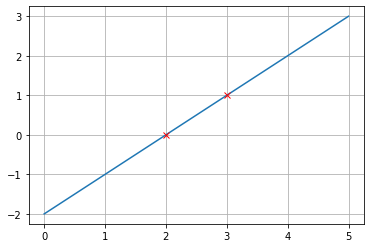

In [3]:
def sol(x):
    return x - 2
xnum = np.linspace(0,5,15)
plt.plot(xnum,sol(xnum))
plt.plot([3,2],[1,0], 'rx')
plt.grid()

---

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [4]:
A = np.array([[1,0,0],
              [1,1,1],
              [1,2,4]])
b = np.array([1,0,1])
np.linalg.inv(A)@b

array([ 1., -2.,  1.])

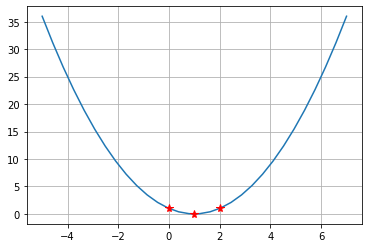

In [5]:
def sol2(x):
    return 1 + (-2*x) + x**2
xnum = np.linspace(-5,7,30)
plt.plot(xnum,sol2(xnum))
plt.plot([0,1,2],[1,0,1], 'r*', ms = 8)
plt.grid()

In [6]:
sol2(2)

1

---

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

<function matplotlib.pyplot.grid(visible=None, which='major', axis='both', **kwargs)>

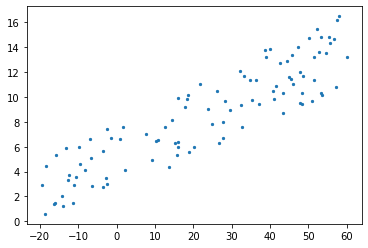

In [7]:
x = np.random.uniform(-20,60,100)
y = 5 + (3/20*x) + np.random.uniform(-3,3,100)
plt.scatter(x,y,s=5) # s --> size
plt.grid

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [116]:
import scipy.optimize as opt

In [9]:
opt.minimize?

In [10]:
# Función objetivo
#Criterio de minimización
#Mínimos cuadrados
def obj_lin(beta,x,y):
    f = beta[0] + beta[1]*x
    return np.sum((y-f)**2)

In [11]:
beta0 = np.random.rand(2)
beta0

array([0.84233315, 0.27637042])

In [12]:
sol_lin = opt.minimize(obj_lin,beta0,args = (x,y))
sol_lin

      fun: 301.7458973840119
 hess_inv: array([[ 9.47330604e-03, -1.93888123e-04],
       [-1.93888123e-04,  8.40376299e-06]])
      jac: array([0.00000000e+00, 3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([5.20957954, 0.14546055])

In [13]:
sol_lin.x

array([5.20957954, 0.14546055])

**El modelo óptimo lineal obtenido es**
$$
f(x) = 4.830 + 0.153x
$$

*con un error acumulado de* $307.205$

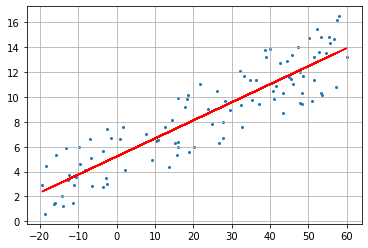

In [14]:
plt.scatter(x,y,s = 4)
f = sol_lin.x[0] + sol_lin.x[1]*x
plt.plot(x,f,'r')
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

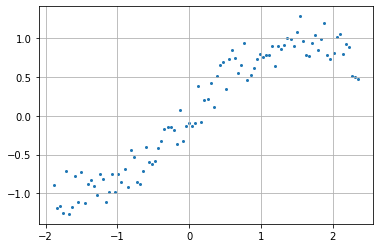

In [28]:
x = np.linspace(-3/5 * np.pi, 3/4*np.pi,100)
y= np.sin(x) + np.random.uniform(-0.3,0.3,100)
plt.scatter(x,y, s = 4)
plt.grid()

In [29]:
n = 5
for i in range(n+1):
    print(i)

0
1
2
3
4
5


In [30]:
beta = np.array([1,2,3,4])
len(beta)-1

3

In [31]:
# Obtención del modelo polinomial
def f(x,beta):
    n = len(beta)-1
    X = np.array([x**i for i in range(n+1)])
    return beta@X
x_ = 1.1
f(x_,beta),beta[0] + (beta[1]*x_) + (beta[2]*x_**2) + (beta[3]*x_**3)

(12.154000000000003, 12.154000000000003)

In [32]:
#Se modifica la función objetivo
def obj_pol(beta,x,y):
    n = len(beta) - 1
    X = np.array([x**i for i in range(n+1)])
    f = beta@X #Modelo a optimizar
    return np.sum((y-f)**2)

In [33]:
# Polinomio de grado uno
beta0 = np.random.rand(2)
sol_1 = opt.minimize(obj_pol,beta0,args = (x,y))
sol_1

      fun: 7.364845813840908
 hess_inv: array([[ 0.00518152, -0.00077039],
       [-0.00077039,  0.00326962]])
      jac: array([ 1.78813934e-07, -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-0.06739023,  0.58223249])

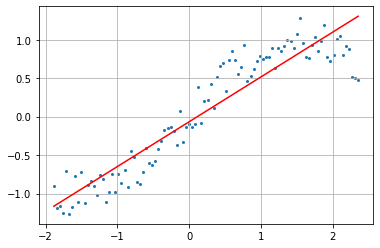

In [34]:
plt.scatter(x,y,s = 4)
plt.plot(x,f(x,sol_1.x), 'r')
plt.grid()

**Clase 07/06/2022**

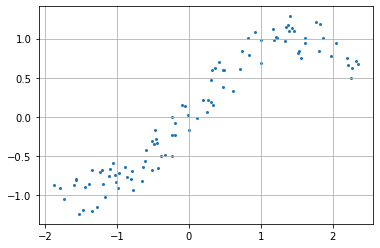

In [75]:
x = np.random.uniform(-3/5*np.pi,3/4*np.pi,100)
y = np.sin(x) + np.random.uniform(-0.3,0.3,100)
plt.scatter(x,y, s = 4)
plt.grid()

In [76]:
def f(x,beta):
    #vemos de que orden debe ser el polnomio
    n = len(beta) - 1
    #Se define el vector de potencias de 'x'
    X = np.array([x**i for i in range(n+1)]) 
    return beta@X
    

In [77]:
#Se define la función objetivo a minimizar mediante mínimos cuadrados
def objetivo(beta,x,y):
    #Se utiliza la 'f' externa como la función que vamos a aproximar
    return np.sum((y-f(x,beta))**2)

In [43]:
#Aproximamos el polinomio lineal
beta0 = np.random.rand(2)
beta0

array([0.02741115, 0.99014982])

In [48]:
solucion = opt.minimize(objetivo,beta0,args =(x,y))
solucion

      fun: 5.805704363038954
 hess_inv: array([[ 0.99122567, -0.10234042],
       [-0.10234042,  0.01436869]])
      jac: array([2.98023224e-07, 2.86102295e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([-0.04781991,  0.62318702])

El modelo lineal que mejor se ajusta al conjunto de datos (x,y) es

$$
y = -0.0478 + 0.6232x
$$

Con un error cuadrático de $5.806$

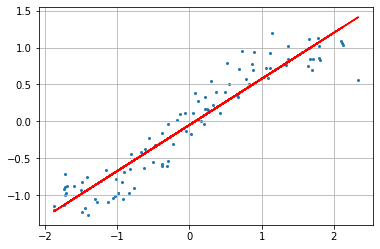

In [54]:
#Gráfica
plt.scatter(x,y, s=4)
plt.plot(x,f(x,solucion.x), 'r', ms = 1)
plt.grid()

In [78]:
#Polinomio de orden dos
beta2 = np.random.rand(3)
solucion2 = opt.minimize(objetivo,beta2,args = (x,y))
solucion2

      fun: 6.985552975824888
 hess_inv: array([[ 1.1027754 , -0.03631142, -0.41139484],
       [-0.03631142,  0.00569956,  0.01256129],
       [-0.41139484,  0.01256129,  0.15493166]])
      jac: array([5.96046448e-08, 1.43051147e-06, 3.33786011e-06])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 3
     njev: 7
   status: 0
  success: True
        x: array([ 0.10651631,  0.65499343, -0.10311526])

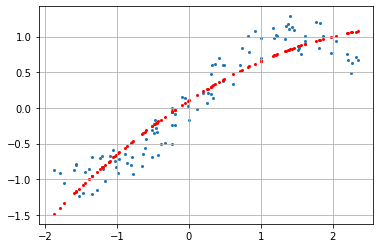

In [79]:
#Gráfica
plt.scatter(x,y, s=4)
plt.scatter(x,f(x,solucion2.x), c = 'r', s=4)
plt.grid()

El mejor modelo polinomial de orden dos es
$$
y = 0.012 + 0.631x - 0.044x^2
$$
Con un error cuadrático acumulado de $5.480$

In [60]:
#Polinomio de orden dos
beta3 = np.random.rand(4)
solucion3 = opt.minimize(objetivo,beta3,args = (x,y))
solucion3

      fun: 3.220472700052135
 hess_inv: array([[ 0.01060866, -0.00104954, -0.00432693,  0.00071475],
       [-0.00104954,  0.02168635,  0.00213311, -0.00703631],
       [-0.00432693,  0.00213311,  0.00343335, -0.00105652],
       [ 0.00071475, -0.00703631, -0.00105652,  0.00277432]])
      jac: array([ 1.34110451e-06,  3.87430191e-07, -1.93715096e-06,  2.17556953e-06])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([-0.01721643,  0.91517552, -0.00180052, -0.11196812])

El mejor modelo polinomial de orden tres es
$$
y = -0.017 + 0.915x - 0.002x^2 - 0.0112x^3
$$
Con un error cuadrático acumulado de $3.220$

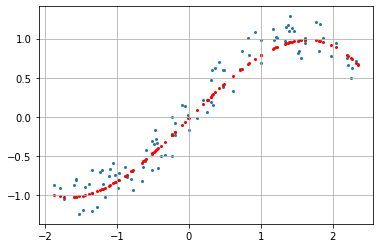

In [81]:
#Gráfica
plt.scatter(x,y, s=4)
plt.scatter(x,f(x,solucion3.x), c = 'r', s=4)
plt.grid()

In [82]:
# Ahora todos los polinomios juntos
#Creamos una lista con todas las soluciones
sol = []

In [83]:
sol.append(1)
sol

[1]

In [84]:
sol.append(2)
sol

[1, 2]

In [86]:
# Se define de nuevo para borrar datos
sol = []
sol

[]

In [87]:
N = 5
for n in range(N):
    beta0 = np.random.rand(n+2)
    sol.append(opt.minimize(objetivo,beta0,args = (x,y)))

In [89]:
sol[0] #Polinomio orden 1

      fun: 8.722413363376631
 hess_inv: array([[ 0.00507448, -0.00051479],
       [-0.00051479,  0.00355817]])
      jac: array([-2.38418579e-07, -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.03280453,  0.60151673])

In [90]:
sol[1] #Polinomio orden 2

      fun: 6.985552975824906
 hess_inv: array([[ 0.01066223,  0.00163   , -0.00413565],
       [ 0.00163   ,  0.00438142, -0.00158742],
       [-0.00413565, -0.00158742,  0.00306091]])
      jac: array([-5.96046448e-08, -1.78813934e-07, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 7
     njev: 10
   status: 0
  success: True
        x: array([ 0.10651632,  0.65499343, -0.10311526])

In [91]:
sol[2] #Polinomio orden 3

      fun: 2.5716542599767562
 hess_inv: array([[ 0.01131338, -0.00135346, -0.00511187,  0.00125418],
       [-0.00135346,  0.0180531 ,  0.00288593, -0.00574713],
       [-0.00511187,  0.00288593,  0.0045246 , -0.00188046],
       [ 0.00125418, -0.00574713, -0.00188046,  0.00241591]])
      jac: array([-2.98023224e-08,  0.00000000e+00,  2.98023224e-08,  2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 9
     njev: 12
   status: 0
  success: True
        x: array([ 0.03070004,  1.00239596,  0.01055696, -0.14603777])

In [92]:
sol[3] #Polinomio orden 4

      fun: 2.5714768291812162
 hess_inv: array([[ 0.01617826,  0.00452328, -0.0157056 , -0.00209755,  0.00310154],
       [ 0.00452328,  0.02563294, -0.01010576, -0.01001142,  0.00383983],
       [-0.0157056 , -0.01010576,  0.02771122,  0.00551435, -0.00680427],
       [-0.00209755, -0.01001142,  0.00551435,  0.00482372, -0.00218151],
       [ 0.00310154,  0.00383983, -0.00680427, -0.00218151,  0.00199952]])
      jac: array([-2.68220901e-07, -1.78813934e-07, -2.08616257e-07, -8.34465027e-07,
       -2.23517418e-06])
  message: 'Optimization terminated successfully.'
     nfev: 84
      nit: 11
     njev: 14
   status: 0
  success: True
        x: array([ 2.93971944e-02,  1.00077869e+00,  1.34181014e-02, -1.45119101e-01,
       -8.41121984e-04])

In [94]:
sol[4] #Polinomio orde 5

      fun: 2.5002994298588335
 hess_inv: array([[ 0.01760394, -0.00159834, -0.02096553,  0.0046276 ,  0.00502384,
        -0.00153048],
       [-0.00159834,  0.05911423,  0.01541433, -0.04569821, -0.00568218,
         0.00794385],
       [-0.02096553,  0.01541433,  0.04817085, -0.02194089, -0.01434262,
         0.00615853],
       [ 0.0046276 , -0.04569821, -0.02194089,  0.04285075,  0.00801789,
        -0.00846906],
       [ 0.00502384, -0.00568218, -0.01434262,  0.00801789,  0.0047795 ,
        -0.00228125],
       [-0.00153048,  0.00794385,  0.00615853, -0.00846906, -0.00228125,
         0.00188755]])
      jac: array([1.57952309e-06, 2.65240669e-06, 1.81794167e-06, 2.50339508e-06,
       6.19888306e-06, 1.57058239e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 257
      nit: 12
     njev: 35
   status: 2
  success: False
        x: array([ 0.0161482 ,  1.06977018,  0.06683881, -0.21865721, -0.02063591,
        0.01638801])

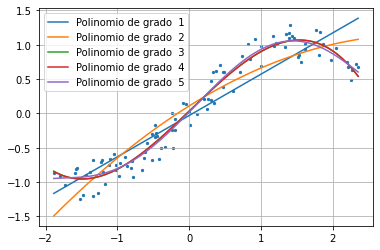

In [104]:
# Gráfica
plt.scatter(x,y,s = 5)
x_ordenada = np.linspace(-3/5*np.pi, 3/4*np.pi,100)
for n in range(N):
    plt.plot(x_ordenada,f(x_ordenada,sol[n].x), label = 'Polinomio de grado  ' + str(n+1))
plt.grid()
plt.legend()

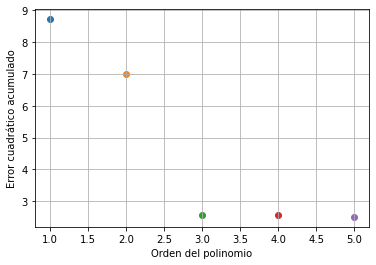

In [105]:
for n in range(N):
    plt.scatter(n+1,sol[n].fun)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

---

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [118]:
# Definimos otra función objetivo
def ridge(beta,x,y, l = 0):
    #Usamos la función 'f' extendida
    return np.sum((y-f(x,beta))**2) + l*np.sum(beta**2)

In [114]:
sol_r =[]
sol_r

[]

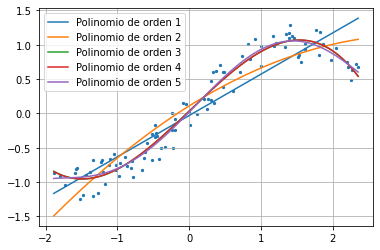

In [125]:
for n in range(N):
    beta0 = np.random.rand(n+2)
    sol_r.append(opt.minimize(ridge,beta0,args = (x,y,50)))
plt.scatter(x,y,s=5)
for n in range(N):
    plt.plot(x_ordenada,f(x_ordenada,sol_r[n].x), label = 'Polinomio de orden ' + str(n+1))
plt.grid()
plt.legend()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [122]:
# Definimos la función objejtivo
def lasso(beta,x,y,l = 0):
    return np.sum((y-f(x,beta))**2) + l*np.sum(np.abs(beta))
    

In [123]:
sol_l = []
sol_l

[]

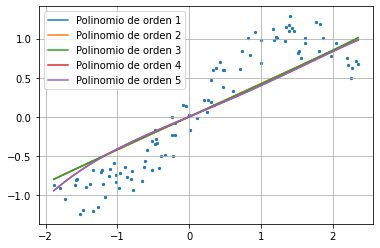

In [132]:
for n in range(N):
    beta0 = np.random.rand(n+2)
    sol_l.append(opt.minimize(lasso,beta0,args = (x,y, 10)))
plt.scatter(x,y,s=5)
for n in range(N):
    plt.plot(x_ordenada,f(x_ordenada,sol_l[n].x), label = 'Polinomio de orden ' + str(n+1))
plt.grid()
plt.legend()

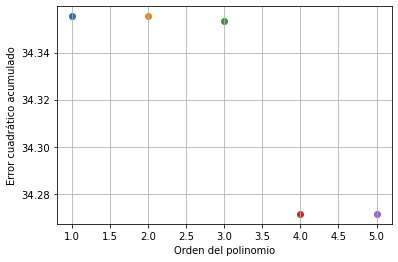

In [133]:
for n in range(N):
    plt.scatter(n+1,sol_l[n].fun)
plt.xlabel('Orden del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

In [134]:
sol_l[0]

      fun: 34.35548267723101
 hess_inv: array([[ 2.21849504e-05, -2.77578198e-05],
       [-2.77578198e-05,  2.97609979e-03]])
      jac: array([40.58114576,  0.115942  ])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 315
      nit: 9
     njev: 101
   status: 2
  success: False
        x: array([-1.61273151e-09,  4.23298129e-01])

In [136]:
sol_l[1]

      fun: 34.3554743591779
 hess_inv: array([[ 1.61159834e-08, -1.59648606e-06, -6.95851788e-10],
       [-1.59648606e-06,  3.06338233e-03, -6.31043836e-08],
       [-6.95851788e-10, -6.31043836e-08,  3.60274483e-08]])
      jac: array([-4.86083031e+01, -4.76074219e-03,  3.11789670e+01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 536
      nit: 19
     njev: 131
   status: 2
  success: False
        x: array([-3.10917410e-07,  4.22874985e-01, -4.24029194e-09])

In [137]:
sol_l[2]

      fun: 34.353259860203444
 hess_inv: array([[ 3.35682414e-10,  1.79763967e-07, -8.60176511e-11,
        -4.98814840e-08],
       [ 1.79763967e-07,  9.34440074e-03, -8.49734670e-07,
        -2.54347734e-03],
       [-8.60176511e-11, -8.49734670e-07,  1.13428226e-09,
         2.38410225e-07],
       [-4.98814840e-08, -2.54347734e-03,  2.38410225e-07,
         9.15225778e-04]])
      jac: array([-4.83344283e+01, -9.78612900e-03,  5.35371594e+01,  3.27014923e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 597
      nit: 29
     njev: 117
   status: 2
  success: False
        x: array([-2.21020011e-08,  4.15442302e-01, -1.06246921e-09,  2.61410210e-03])

In [138]:
sol_l[3]

      fun: 34.27139551266772
 hess_inv: array([[ 1.53762326e-10, -1.29231333e-07,  1.37341152e-10,
         6.50133332e-08, -5.57692972e-09],
       [-1.29231333e-07,  1.72793666e-02,  1.36513594e-06,
        -6.61775827e-03,  9.92641649e-04],
       [ 1.37341152e-10,  1.36513594e-06,  2.11032632e-09,
        -7.60881549e-07,  1.03304542e-07],
       [ 6.50133332e-08, -6.61775827e-03, -7.60881549e-07,
         3.08198724e-03, -5.49049590e-04],
       [-5.57692972e-09,  9.92641649e-04,  1.03304542e-07,
        -5.49049590e-04,  1.66993280e-04]])
      jac: array([-9.53074217e+00, -4.76837158e-07,  4.71611733e+01,  5.88417053e-04,
        2.73036957e-03])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 672
      nit: 31
     njev: 110
   status: 2
  success: False
        x: array([-8.72394151e-09,  3.84407530e-01, -8.49328986e-10,  2.08852924e-02,
       -6.39003400e-03])

In [139]:
sol_l[4]

      fun: 34.27139594988171
 hess_inv: array([[ 1.16717197e-09, -2.38128763e-07, -1.88888536e-11,
         1.00388454e-07, -1.81079158e-08, -9.89915615e-13],
       [-2.38128763e-07,  1.80142965e-02, -5.43291690e-07,
        -6.38868936e-03,  1.01898788e-03,  6.37759105e-08],
       [-1.88888536e-11, -5.43291690e-07,  1.93738502e-10,
         2.05730530e-07, -3.31526005e-08,  1.10426070e-11],
       [ 1.00388454e-07, -6.38868936e-03,  2.05730530e-07,
         2.85748026e-03, -5.78926984e-04, -2.43444408e-08],
       [-1.81079158e-08,  1.01898788e-03, -3.31526005e-08,
        -5.78926984e-04,  2.32267340e-04,  5.12400811e-09],
       [-9.89915615e-13,  6.37759105e-08,  1.10426070e-11,
        -2.43444408e-08,  5.12400811e-09,  2.26893099e-10]])
      jac: array([ 3.22559013e+01, -3.51476669e-03, -1.42382126e+01, -4.50801849e-03,
       -5.20038605e-03, -3.20243645e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 1006
      nit: 36
     njev: 1